<a href="https://colab.research.google.com/github/Kennedy87670/Introduction-to-ML-DP/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer vision is the pratice of writing algorithn which can discover patterns in visual data. such as the camera of a self-driving car regonizing the car in front

Get the data
The images we are working with are from FOOD101 dataset (101 different classes of food):https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified it to only use two classes (pizza & steak) using the image data modification notebook

**Note** we start with a smaller dataset so we can experiment quickly and figure what works(or better what doesnt work before scaling up)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-18 19:11:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.250.4.128, 216.58.203.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   231MB/s    in 0.5s    

2022-07-18 19:11:07 (231 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become on with it)

A very crucial step at the beginning of any machine learning project is becoming one with the DeprecationWarning

And for a computer vision project.... this usually means visuallizing many samples of our data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are{len(dirnames)} dirctories and {len(filenames)} images in '{dirpath}'. ")

There are2 dirctories and 0 images in 'pizza_steak'. 
There are2 dirctories and 0 images in 'pizza_steak/test'. 
There are0 dirctories and 250 images in 'pizza_steak/test/steak'. 
There are0 dirctories and 250 images in 'pizza_steak/test/pizza'. 
There are2 dirctories and 0 images in 'pizza_steak/train'. 
There are0 dirctories and 750 images in 'pizza_steak/train/steak'. 
There are0 dirctories and 750 images in 'pizza_steak/train/pizza'. 


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 18 19:11 .
drwxr-xr-x 1 root root 4096 Jul 18 19:11 ..
drwxr-xr-x 4 root root 4096 Jul 18 19:11 test
drwxr-xr-x 4 root root 4096 Jul 18 19:11 train


In [ ]:
# ANOTHER way to find out how many omages are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first lets get the class names programmatically

In [ ]:
# Get the classnams programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # setup the target directory(we will view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape} ") # show the shape of the image

  return img

['1524599.jpg']
Image shape: (512, 510, 3) 


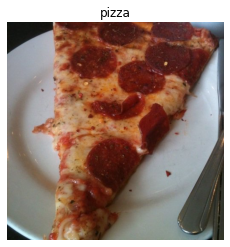

In [ ]:
# View  a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 510, 3), dtype=uint8, numpy=
array([[[ 15,  20,  16],
        [ 15,  20,  16],
        [ 15,  20,  16],
        ...,
        [105, 130, 152],
        [103, 128, 150],
        [103, 125, 146]],

       [[ 14,  19,  15],
        [ 14,  19,  15],
        [ 14,  19,  15],
        ...,
        [104, 129, 151],
        [105, 127, 150],
        [102, 124, 145]],

       [[ 14,  19,  15],
        [ 14,  19,  15],
        [ 14,  19,  15],
        ...,
        [105, 130, 152],
        [105, 127, 148],
        [102, 124, 145]],

       ...,

       [[ 17,  19,  14],
        [ 15,  17,  12],
        [ 13,  15,  10],
        ...,
        [ 52,  56,  42],
        [ 49,  55,  41],
        [ 49,  55,  41]],

       [[ 21,  22,  17],
        [ 17,  19,  14],
        [ 14,  16,  11],
        ...,
        [ 49,  55,  41],
        [ 49,  55,  41],
        [ 50,  56,  42]],

       [[ 24,  25,  20],
        [ 20,  21,  16],
        [ 15,  17,  12],
        ...,
        [ 48,  54,  4

In [ ]:
# view the image shape
img.shape  # returns width, height, colour channels


(512, 510, 3)

In [ ]:
img.max()

255

In [ ]:
img.min

<function ndarray.min>

**Note** as we have discussed before many machine learning models, including neural networks prefer the values theywork with to be between 0 and 1. knowing this, one of the most common preprocessing steps for working with images is to scale (also reffered to as normalize) their pixel values by dividing the image array 255. (since 255 is the maximu pixel value)

In [ ]:
# Get all the pixe values between 0 and 1
img/225.

array([[[0.06666667, 0.08888889, 0.07111111],
        [0.06666667, 0.08888889, 0.07111111],
        [0.06666667, 0.08888889, 0.07111111],
        ...,
        [0.46666667, 0.57777778, 0.67555556],
        [0.45777778, 0.56888889, 0.66666667],
        [0.45777778, 0.55555556, 0.64888889]],

       [[0.06222222, 0.08444444, 0.06666667],
        [0.06222222, 0.08444444, 0.06666667],
        [0.06222222, 0.08444444, 0.06666667],
        ...,
        [0.46222222, 0.57333333, 0.67111111],
        [0.46666667, 0.56444444, 0.66666667],
        [0.45333333, 0.55111111, 0.64444444]],

       [[0.06222222, 0.08444444, 0.06666667],
        [0.06222222, 0.08444444, 0.06666667],
        [0.06222222, 0.08444444, 0.06666667],
        ...,
        [0.46666667, 0.57777778, 0.67555556],
        [0.46666667, 0.56444444, 0.65777778],
        [0.45333333, 0.55111111, 0.64444444]],

       ...,

       [[0.07555556, 0.08444444, 0.06222222],
        [0.06666667, 0.07555556, 0.05333333],
        [0.05777778, 0

## AN END-END EXAMPE
lets build a Convolution neural network to find patterns in our images, more speciafially we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our mpimg.image
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# preproces data (get all of the pixel values between 0 & 1, also called normilization/ scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/train"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42
                                               )
# Build a CNN model ( same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters =10,
                                                             kernel_size =3,
                                                             activation = 'relu',
                                                             input_shape = (224, 224, 3)),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding='valid'),
          tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
          tf.keras.layers.Conv2D(10, 3, activation="relu"),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation= 'sigmoid')

])

# compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# #fit the model 
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 331ms/step - loss: 0.5671 - accuracy: 0.6980 - val_loss: 0.4451 - val_accuracy: 0.7987
Epoch 2/5
47/47 [==============================] - 15s 322ms/step - loss: 0.4134 - accuracy: 0.8100 - val_loss: 0.3635 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 15s 323ms/step - loss: 0.3856 - accuracy: 0.8360 - val_loss: 0.3356 - val_accuracy: 0.8733
Epoch 4/5
47/47 [==============================] - 15s 321ms/step - loss: 0.3352 - accuracy: 0.8633 - val_loss: 0.2898 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 16s 336ms/step - loss: 0.2990 - accuracy: 0.8800 - val_loss: 0.3099 - val_accuracy: 0.8767


**Note** if the above cell is taking longer tahn -10 seconds per epoch make sure you are using GPU by going to Runtime-> Chabge Runtime -> Hardware Accelator -> Gpu (you may have to rerun the cells above).

In [ ]:
len(train_data)

47

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

https://poloclub.github.io/cnn-explainer/


CNN explainer

## Using the same model as before

Lets replicate the model we have built in a previous section to see if it works with our image data.

The model we are building is from TensorFlow playground:https://playground.tensorflow.org

In [ ]:
# set random seed 
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile our CNN
model_2.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# #fit the model 
history_2 = model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 309ms/step - loss: 1.1647 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 301ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 302ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 14s 302ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 302ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1),
model_2 performs terribly ....  lets try to improve 

In [ ]:
# set random seed 
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile our model
model_3.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# #fit the model 
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 308ms/step - loss: 3.1986 - accuracy: 0.6367 - val_loss: 1.5953 - val_accuracy: 0.6967
Epoch 2/5
47/47 [==============================] - 14s 303ms/step - loss: 0.9166 - accuracy: 0.7167 - val_loss: 0.7019 - val_accuracy: 0.7407
Epoch 3/5
47/47 [==============================] - 15s 317ms/step - loss: 0.8145 - accuracy: 0.7287 - val_loss: 1.5937 - val_accuracy: 0.5973
Epoch 4/5
47/47 [==============================] - 14s 304ms/step - loss: 1.0193 - accuracy: 0.7107 - val_loss: 0.4012 - val_accuracy: 0.8207
Epoch 5/5
47/47 [==============================] - 14s 301ms/step - loss: 0.6820 - accuracy: 0.7600 - val_loss: 0.5842 - val_accuracy: 0.7540


In [ ]:
# summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note** You can think of trainable parameters as patterns a model can learn from data. intuitively, you might think more is better. and in lots of cases, it is. but in this case, the difference here is the two different style of model we are using. where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neautral network seeks to sort out and learn the most important patterns in an image. So even though these are less learnable parameters in our convolutuional neaural network, these are often more helpful in dechipering between different features in an image

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification : lets break it out

1. Become one with data (visualize, visualize, visualize)
2. Preproces the data (prepare it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Ajust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

Become one with the data

['1987213.jpg']
Image shape: (512, 512, 3) 
['3000535.jpg']
Image shape: (512, 512, 3) 


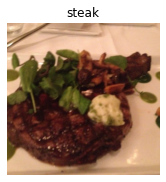

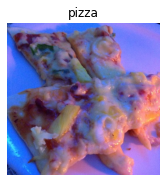

In [ ]:
# visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "pizza")


## 2. preprocess the data(prepare it for a model)

In [ ]:
## Define our diectory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches

A batch is a small subset of data. rather than look at all 10,000 images at once, a model might only look at 32 at a time

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of our processor (GPU)

2. Try to learn the patterns in 10,000 images in one hit could result in model not being able to learn very well.

why 32?? 
Because 32 is good 

In [ ]:
!nvidia-smi

Mon Jul 18 19:15:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load in our image data from directories and turn them into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of image
                                               target_size=(224,224),# target sie of mages (height, width)
                                               class_mode='binary',# type of data you are working with
                                               batch_size=32)# size of minbatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a train data batch
images, labels = train_data.next() #get the next batch of images/labels in tarin data
len(images), len(labels)

(32, 32)

In [ ]:
# how many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experimentand then as you keep experimenting, you try to beat the baseline

**Note**: In deep learning, there is almost an infinite amount of architecture you could create. so one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolution neural network)
model_4 = Sequential([
  Conv2D(filters =10, # its the number of sliding windows going across an input(higher= more complex model)
         kernel_size=3, # the side of the sliding window going across an input
         strides=1, # the size of steps the sliding window takes across an input
         padding="valid", # if same, output is same as input shape, if valid output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neauron)

])

In [ ]:
# compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']


)

In [ ]:
# Get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Fit the model
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
#fit the model
history_4 =  model_4.fit(train_data, # this is a combination of labels and samples
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data)
                       
                       
                       )

Epoch 1/5
47/47 [==============================] - 11s 227ms/step - loss: 1.3126 - accuracy: 0.6900 - val_loss: 0.4263 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4145 - accuracy: 0.8227 - val_loss: 0.3806 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3117 - accuracy: 0.8767 - val_loss: 0.3938 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.1744 - accuracy: 0.9393 - val_loss: 0.4708 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.0641 - accuracy: 0.9860 - val_loss: 0.5472 - val_accuracy: 0.8020


## 5.  Evalaute our model
it looks like our model is learning something, lets evalaute it

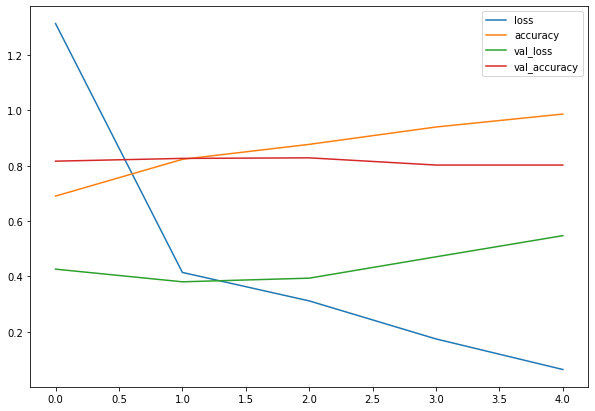

In [ ]:
# lets plot the training cuves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss= history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, loss, label="training_accuracy")
  plt.plot(epochs, val_loss, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note** when a model"s **validation loss** starts to incrase, its likely the model is over fitting the training data set. this means its learning the patterns in the training dataset *too well* and thus the models ablility to generalize to unsen data will be diminished

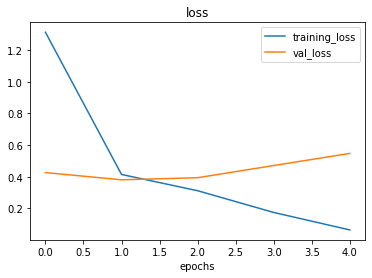

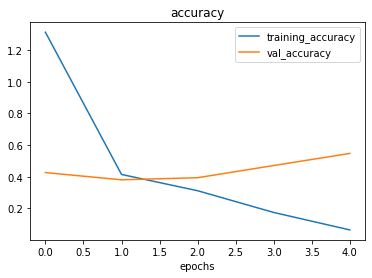

In [ ]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. adjust the model parameters
Fitting a machine learning model comes in 3 steps:

0. create a basline
1. beat the baseline by overfitting a larger model
2. Reduce over fitting

ways to indulce overfitting
* Increase the number of cov layers
* Increase the number of cov filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regulization layers (such as MaxPool2D)
* Add more data.....

**Note** Reducing overfitting is also known as regularization

In [ ]:
# Create the model (this will be our baseline, a layer convolution neural network)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_5.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']


)

In [ ]:
#fit the model
history_5 =  model_5.fit(train_data, # this is a combination of labels and samples
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data)
                   )

Epoch 1/5
47/47 [==============================] - 11s 211ms/step - loss: 0.5890 - accuracy: 0.6873 - val_loss: 0.4483 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4517 - accuracy: 0.8047 - val_loss: 0.3711 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4181 - accuracy: 0.8160 - val_loss: 0.3596 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3782 - accuracy: 0.8287 - val_loss: 0.3233 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3685 - accuracy: 0.8460 - val_loss: 0.3504 - val_accuracy: 0.8420


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

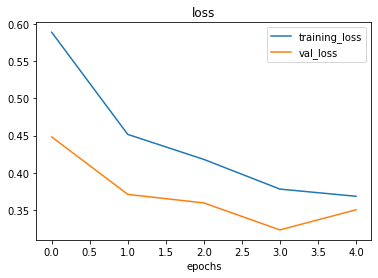

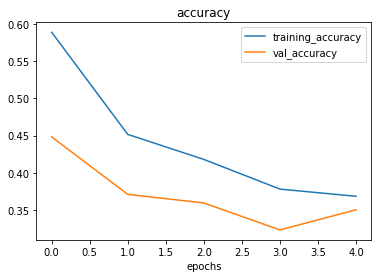

In [ ]:
#plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmenatation

In [ ]:
## Create ImageDataGenerator training instant with data arugumentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate the image
                                             shear_range = 0.2, #how much do you want to shear an image
                                             zoom_range= 0.2, # zoom in randomly on an image
                                             width_shift_range = 0.2, # move your image around on the x-axis
                                             height_shift_range =0.3, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create Imagedatagenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


**What is data augmentation?**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or aomething similar

lets write some code to visualize data augmentataion

In [ ]:
# import data and augment it from training directory
print('Agumented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size= (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=False) # for demonstartion purpose only

# Create non- augumented train data batches
print("Non- augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                                   target_size= (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=False)           
IMG_SIZE =(224 , 224)
# create non-augmented test data batches
print('Agumented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                                   target_size= IMG_SIZE,
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=False) # for demonstartion purpose only


Agumented training data
Found 1500 images belonging to 2 classes.
Non- augmented training data:
Found 1500 images belonging to 2 classes.
Agumented test data
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually only performed on the training data using 'ImageDataGenerator' built in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded in the model

Finally lets visualize some  augumented data

In [ ]:
# get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels arent augmented train are

showing image number: 9


(-0.5, 223.5, 223.5, -0.5)

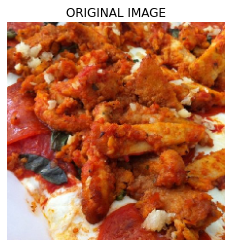

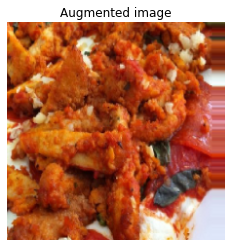

In [ ]:
# show original image and augmentation
import random
random_number = random.randint(0, 31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"ORIGINAL IMAGE")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we have seen what augmented training data looks like, lets build a model and see how it learns on augmented data

In [ ]:
# Create the model (this will be our baseline, a layer convolution neural network)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
             )
#fit the model
history_6 = model_6.fit(train_data_augmented,  #fitting modl 6 on augumented data
                         epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data)
                  )

Epoch 1/5
47/47 [==============================] - 25s 530ms/step - loss: 0.7058 - accuracy: 0.3780 - val_loss: 0.6878 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6923 - accuracy: 0.5207 - val_loss: 0.6807 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 25s 524ms/step - loss: 0.7004 - accuracy: 0.5187 - val_loss: 0.6780 - val_accuracy: 0.6640
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6889 - accuracy: 0.5733 - val_loss: 0.6535 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6793 - accuracy: 0.6073 - val_loss: 0.5614 - val_accuracy: 0.6820


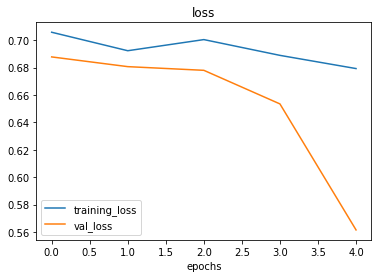

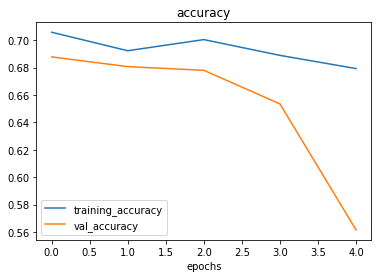

In [ ]:
# Check our models training curve
plot_loss_curves(history_6)

lets shuffle our augmented training data and train another model(the same as before) on it and see what happens

In [ ]:
# import data and augment and shuffled it from training directory
print('Agumented training data shuffle')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size= (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=True) # shuffle the data
# Create the model (this will be our baseline, a layer convolution neural network)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
             )
#fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,  #fitting modl 6 on augumented data shuffled
                         epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data,
                       validation_steps=len(test_data)
                  )

Agumented training data shuffle
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 538ms/step - loss: 0.6481 - accuracy: 0.6080 - val_loss: 0.5773 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5810 - accuracy: 0.6887 - val_loss: 0.5331 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 26s 545ms/step - loss: 0.5197 - accuracy: 0.7373 - val_loss: 0.3978 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 25s 529ms/step - loss: 0.5023 - accuracy: 0.7553 - val_loss: 0.3699 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4990 - accuracy: 0.7720 - val_loss: 0.3969 - val_accuracy: 0.8200


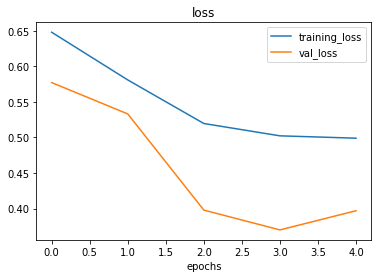

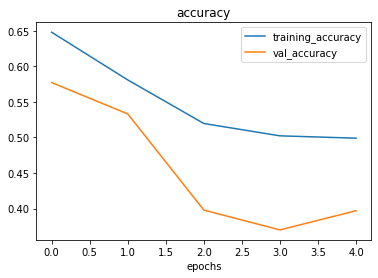

In [ ]:
# plot the loss curves
plot_loss_curves(history_7)

## 7. Repeat until satisfied

Since we have already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g add more "Conv2D/ MaxPool2D" layers
* Increase the number of filters in each convolutional layers (eg from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn )
* Use **Transfer learning** to leverage what another image model has learn and adjust it for our own use case




Making a prediction with our trained model on our own custom data

In [ ]:
## classes we are working on
print(class_names)

['pizza' 'steak']


--2022-07-18 19:21:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-07-18 19:21:58 (203 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



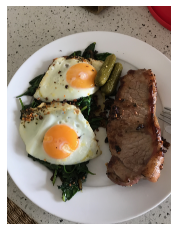

In [ ]:
# View our example image
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# check the shape of our image
steak.shape

(4032, 3024, 3)

**NOTE** when ypu train a neural network and you want to make prediction with it on your own custom data, its important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [ ]:
# create a function to import an imag and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reas an image from filenaame turns it into tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """
  # read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img =tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
#steak = tf.expand_dims(steak, axis=0)
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9105813]], dtype=float32)

Looks like  our custom image is being put through our model, however, it currently outputs a prediction probability, wouldnt it be nice if we could visualize the image and model prediction

In [ ]:
# we can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class} ")
  plt.axis(False);

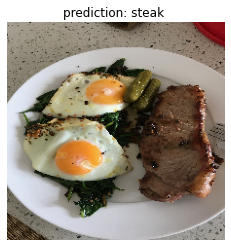

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works lets try on another image.... this time pizza

--2022-07-18 19:22:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-07-18 19:22:01 (272 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



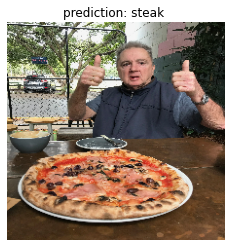

In [ ]:
#Downlaod  another test custom image and a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,"03-pizza-dad.jpeg")

## Multi-class image classification
We have just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we are goint to step things up notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Createa model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat basline/ reduce overfitting)
7. Repeat until satisfied

In [ ]:
# Download zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

import zipfile
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-18 19:22:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  69.0MB/s    in 7.5s    

2022-07-18 19:22:10 (65.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jul 18 19:22 .
drwxr-xr-x  1 root root 4096 Jul 18 19:22 ..
drwxr-xr-x 12 root root 4096 Jul 18 19:22 test
drwxr-xr-x 12 root root 4096 Jul 18 19:22 train


In [ ]:
# set up the train and test directories
train_dir= "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
# lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['220910.jpg']
Image shape: (512, 382, 3) 


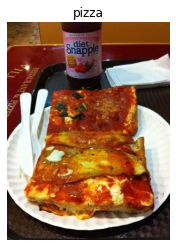

In [ ]:
## visualize visualize visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Preprocess the data (prepare it for model)
## Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# load in our image data from directories and turn them into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of image
                                               target_size=(224,224),# target sie of mages (height, width)
                                               class_mode='categorical',# type of data you are working with
                                               batch_size=32)# size of minbatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


3.Create a model(start with a baseline)
we have been talking about the CNN explainer website..... how about we just take their model(also on 10 classes) and use it for problem....?

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolution neural network)
model_8 = Sequential([
  Conv2D(filters =10, # its the number of sliding windows going across an input(higher= more complex model)
         kernel_size=3, # the side of the sliding window going across an input
         strides=1, # the size of steps the sliding window takes across an input
         padding="valid", # if same, output is same as input shape, if valid output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # output layer (working with categorical classification so only 1 output neauron)

])

In [ ]:
# compile the model
model_8.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']


)

In [ ]:
#fit the model
history_8 =  model_8.fit(train_data, # 10 samples
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data) 
                     )

Epoch 1/5
235/235 [==============================] - 52s 217ms/step - loss: 2.2444 - accuracy: 0.1493 - val_loss: 2.1439 - val_accuracy: 0.2052
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 2.0471 - accuracy: 0.2659 - val_loss: 2.0136 - val_accuracy: 0.2812
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 1.7577 - accuracy: 0.3988 - val_loss: 1.8723 - val_accuracy: 0.3540
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 1.2085 - accuracy: 0.5943 - val_loss: 2.1827 - val_accuracy: 0.3100
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.5960 - accuracy: 0.8097 - val_loss: 2.8097 - val_accuracy: 0.2856


## 5. evaluate the model

In [ ]:
# Evaluate the test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 2.8097 - accuracy: 0.2856


[2.809749126434326, 0.2856000065803528]

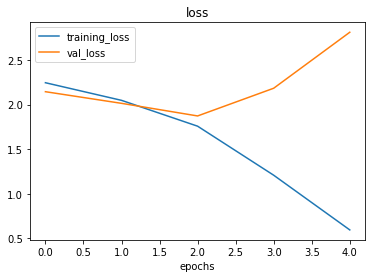

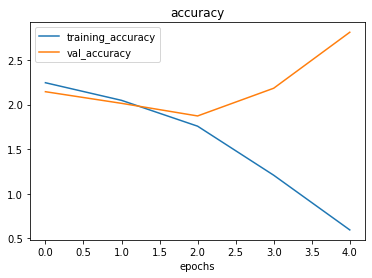

In [ ]:
# check the models loss curves
plot_loss_curves(history_8)

what do these loss curves tell us??

well it seems our model is **overfitting** the training set quite badly in other words, its getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

## 6. Adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

Due to its performance on the training data. its clear our model is learning something....

However its not generalizing well to unseen data(overfitting).

So, lets try and fix overfitting by

* **Get more data** - having more data gives a model more opportunity to learn divrse patterns
* **Simplfy the model** if our current model isoverfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce: # of laeyers or reduce # hidden units of layer
* **Use data augmentation** data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use tranfer learning** transfer learning leverages the patterns another model has learned on similar data to your own and allows you use those patterns on your own dataset

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
# How about we try and simplify the model first??
# lets try to remove 2 convolutional layers....
# Create the model (this will be our baseline, a layer convolution neural network)
model_9 = Sequential([
  Conv2D(filters =10, # its the number of sliding windows going across an input(higher= more complex model)
         kernel_size=3, # the side of the sliding window going across an input
         strides=1, # the size of steps the sliding window takes across an input
         padding="valid", # if same, output is same as input shape, if valid output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # output layer (working with categorical classification so only 1 output neauron)

])


In [ ]:
# compile the model
model_9.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']


)

In [ ]:
#fit the model
history_9 =  model_9.fit(train_data, # 10 samples
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data) 
                     )

Epoch 1/5
235/235 [==============================] - 53s 222ms/step - loss: 2.2722 - accuracy: 0.2313 - val_loss: 1.9708 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 48s 206ms/step - loss: 1.7704 - accuracy: 0.3961 - val_loss: 1.9359 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 50s 214ms/step - loss: 1.4574 - accuracy: 0.5163 - val_loss: 1.9575 - val_accuracy: 0.3512
Epoch 4/5
235/235 [==============================] - 49s 207ms/step - loss: 1.0445 - accuracy: 0.6652 - val_loss: 2.2523 - val_accuracy: 0.3152
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.6648 - accuracy: 0.7977 - val_loss: 2.5738 - val_accuracy: 0.2872


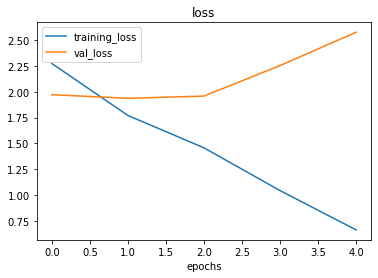

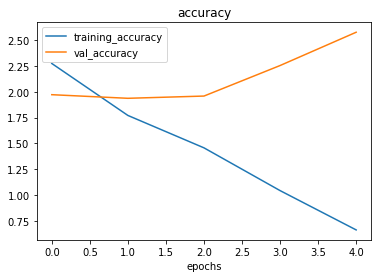

In [ ]:
# check out the loss curves of model_10
plot_loss_curves(history_9)

look like our simplifying the model experiment didnt work... the accuracywent down and overfitting continued....


how about we try data augumentation??

### Try to reduce overfiting with data augmentation

lets try and improve our model results by augmented training data....

ideally, we want to:

* Reduce overfitting(get the train and validation loss curves closer)
* Improve validatioaccuracy

In [ ]:
## Create ImageDataGenerator training instant with data arugumentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate the image
                                             zoom_range= 0.2, # zoom in randomly on an image
                                             width_shift_range = 0.2, # move your image around on the x-axis
                                             height_shift_range =0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# import data and augment it from training directory
print('Agumented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size= (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical',
                                                                   )



Agumented training data
Found 7500 images belonging to 10 classes.


In [ ]:
# lets create another model but this time we will fit it on the augmented trained data
model_10 = tf.keras.models.clone_model(model_8)

# compile the cloned model (using the same setup as previous models)
model_10.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']
)

#fit the model
history_10 =  model_10.fit(train_data_augmented, # 10 samples
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data) 
                     )

Epoch 1/5
235/235 [==============================] - 127s 538ms/step - loss: 2.2149 - accuracy: 0.1808 - val_loss: 2.0284 - val_accuracy: 0.2756
Epoch 2/5
235/235 [==============================] - 127s 540ms/step - loss: 2.0791 - accuracy: 0.2579 - val_loss: 1.9802 - val_accuracy: 0.2816
Epoch 3/5
235/235 [==============================] - 127s 540ms/step - loss: 2.0362 - accuracy: 0.2772 - val_loss: 1.9453 - val_accuracy: 0.3064
Epoch 4/5
235/235 [==============================] - 127s 540ms/step - loss: 1.9906 - accuracy: 0.2995 - val_loss: 1.8565 - val_accuracy: 0.3588
Epoch 5/5
235/235 [==============================] - 126s 537ms/step - loss: 1.9681 - accuracy: 0.3119 - val_loss: 1.7919 - val_accuracy: 0.3728


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 2.8097 - accuracy: 0.2856


[2.809749126434326, 0.2856000065803528]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.7919 - accuracy: 0.3728


[1.791948676109314, 0.37279999256134033]

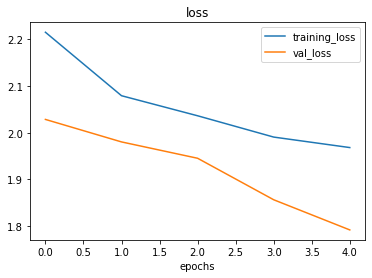

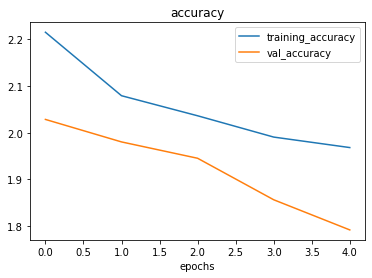

In [ ]:
# check out our model trained on augumented data loss curves
plot_loss_curves(history_10)


woah!!! that looks much better the loss curves are much closer to each other than the baseline model and they look like dey are heading in the right direction (certainly not the wrong direction( so if you were to train for longer, we might see further improvements.

## 7. Repeat until satisfied
We could keep going here... continally trying to bring out loss curves together and trying to improve the validation/test accuracy.

how??

By running lots of experiments, namely:
* restructuring our models architecture (increasing layers/ hidden units)
* adjust the learning rate 
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (e.g 10 epochs instead of 5 epochs)
* try transfer learning

## making a prediction with the trained model

lets use our trained model to make some predictions on our own custom images!!

In [ ]:
# download some cutome images 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-07-18 19:49:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2022-07-18 19:49:51 (281 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-07-18 19:49:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
list[classnames]

NameError: ignored

reconfiure pred and plot to suit multiclass classification


In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Add inlogic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    #get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class} ")
  plt.axis(False);

In [ ]:
# make a prediction using model_10
pred_and_plot(model=model_10,
              filename ="03-pizza-dad.jpeg",
              class_names= class_names
              )

looks like our model didnt perform very well on our cutom image but this is beacause it only achieved 39% accuracy on the test data. so we expect it to responde poorly on other unseen data

# saving and loading our model

In [ ]:
# save a model
model_10.save("saved_trained_model_10")

In [ ]:
#load in a trained model and evaluate it
loaded_model_10 = tf.keras.model.loaded_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

In [ ]:
# compare our loaded model to our exisiting model
model_10.evaluate(test_data)